In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Axis 커스터마이징

## Axis Sharing
- x축, y축 레이블의 중복을 방지할 수 있다.
- ax.set_xlim() / ax.set_ylim()을 사용해서 축을 공유할 수 있다.
- 여러 그래프를 그릴 때 axis sharing은 자주 발생한다.

### 1) subplots

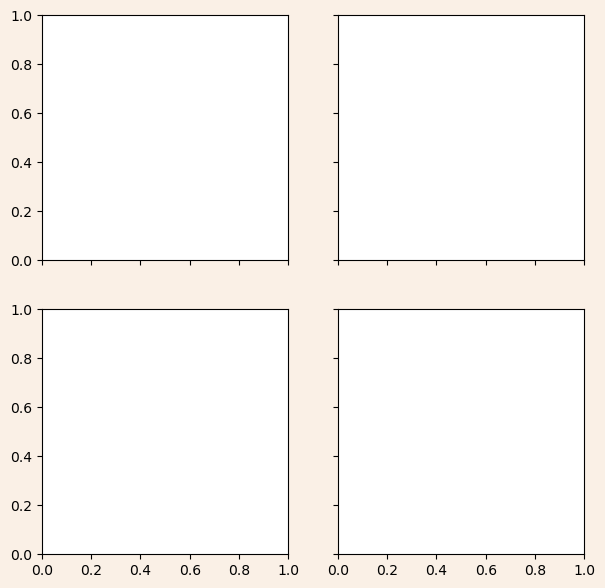

In [2]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7), facecolor='linen', sharex=True, sharey=True)

(10.0, 1000.0)

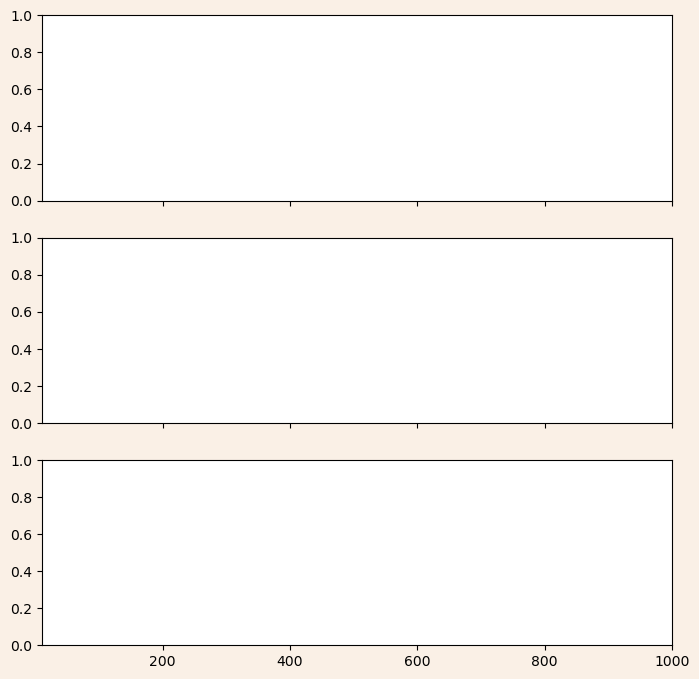

In [3]:
# 하나의 그래프에 대해서만 set_xlim을 사용해도 무방하다.
fig, axes = plt.subplots(3, 1, figsize=(7, 7), facecolor='linen', sharex=True)
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95, hspace=0.2)
axes[0].set_xlim([10, 1000])

(0.0, 1.0)

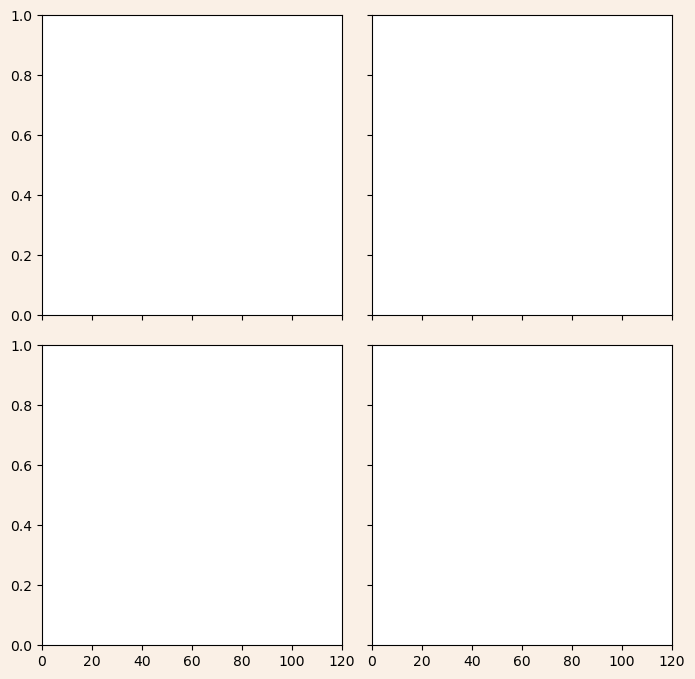

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7), facecolor='linen', sharex=True, sharey=True)
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95, hspace=0.1, wspace=0.1)
axes[0, 0].set_xlim([0, 120])
axes[0, 0].set_ylim([0, 1])

### 2) add_subplot
- subplots와는 sharex/sharey 동작방식이 다르다.

(0.0, 100.0)

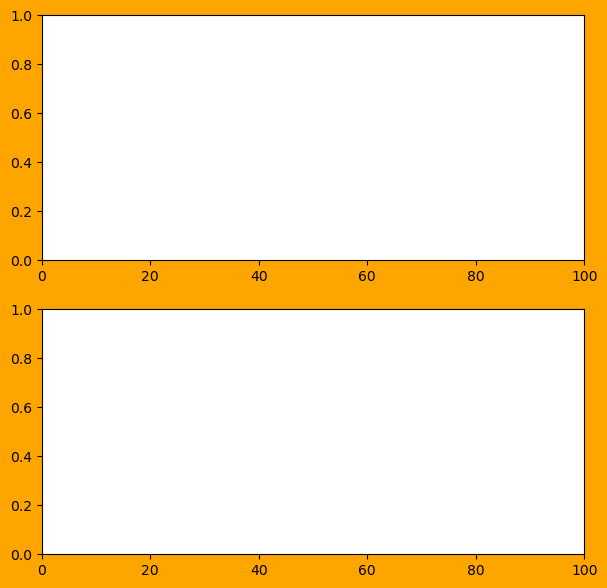

In [5]:
fig = plt.figure(figsize=(7, 7), facecolor='orange')
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.set_xlim([0, 100])

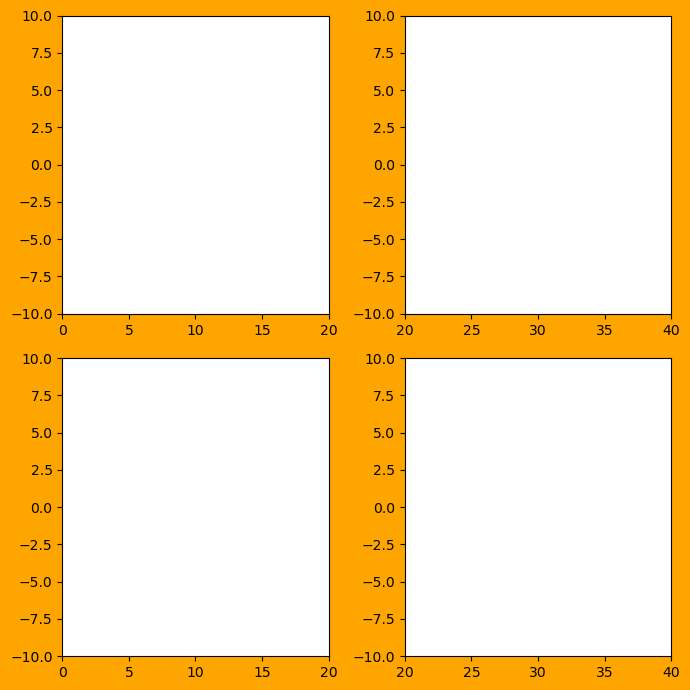

In [6]:
fig = plt.figure(figsize=(7, 7), facecolor='orange')

ax1_1 = fig.add_subplot(221)
ax1_2 = fig.add_subplot(222, sharey=ax1_1)
ax2_1 = fig.add_subplot(223, sharex=ax1_1)
ax2_2 = fig.add_subplot(224, sharex=ax1_2, sharey=ax2_1)

ax1_1.set_ylim([-10, 10])
ax2_1.set_ylim([-10, 10])
ax2_1.set_xlim([0, 20])
ax2_2.set_xlim([20, 40])

fig.tight_layout()

(10.0, 1000.0)

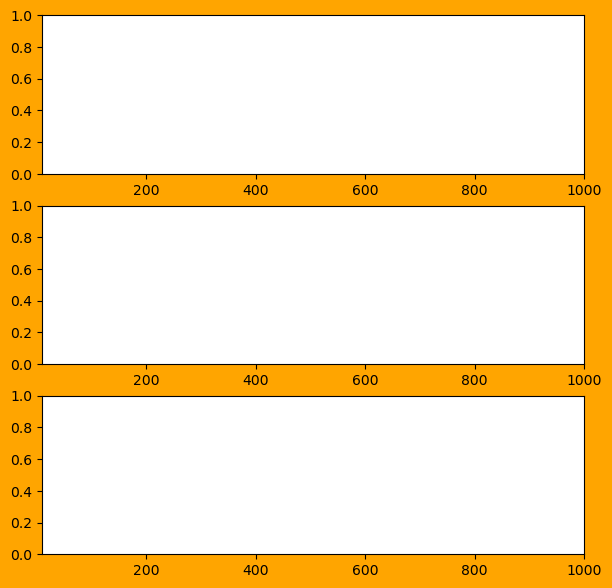

In [7]:
fig = plt.figure(figsize=(7, 7), facecolor='orange')

# ax1 = fig.add_subplot(311)
# ax2 = fig.add_subplot(312, sharex=ax1)
# ax3 = fig.add_subplot(313, sharex=ax1)
# ax3.set_xlim([10, 1000])

axes = np.empty(shape=(0, ))
for ax_idx in range(1, 4):
    if ax_idx == 1:
        axes = np.append(axes, fig.add_subplot(3, 1, ax_idx))
    else:
        axes = np.append(axes, fig.add_subplot(3, 1, ax_idx, sharex=axes[0]))

axes[0].set_xlim([10, 1000])

(0.0, 300.0)

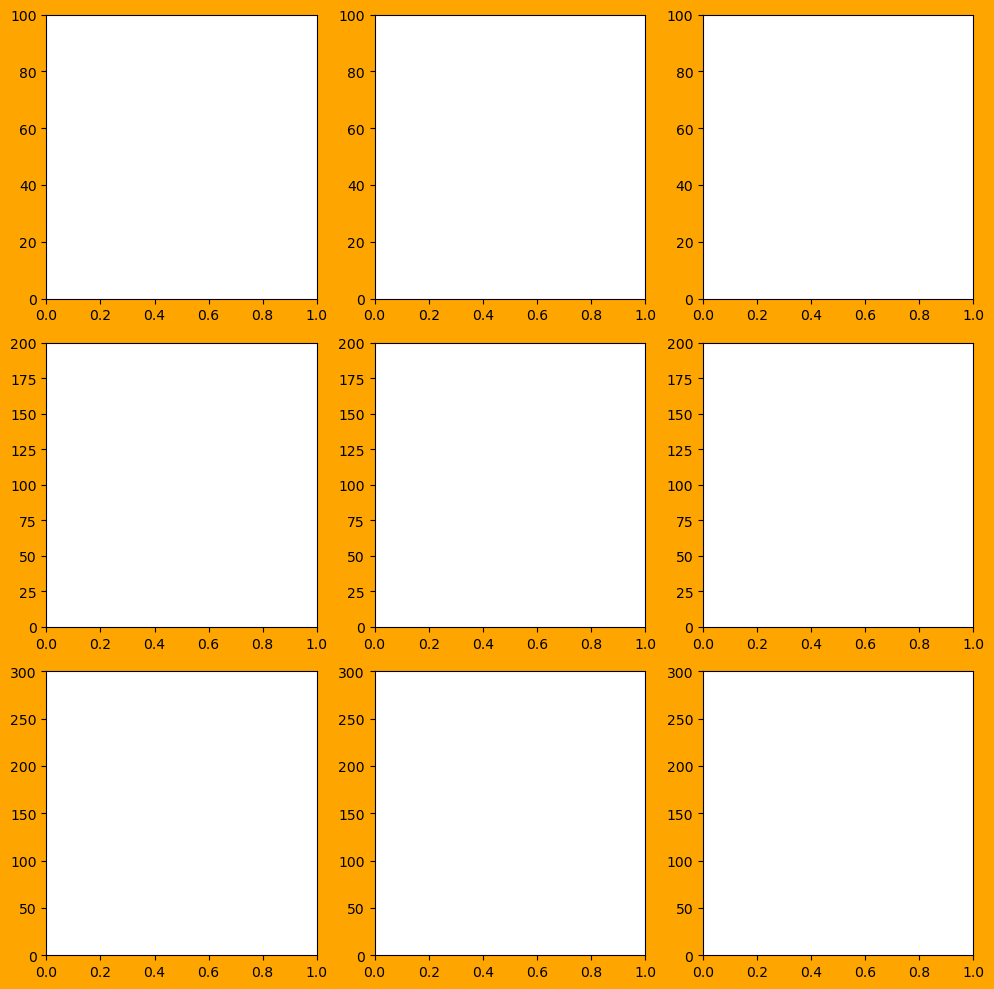

In [8]:
# sharing y_lim
fig = plt.figure(figsize=(10, 10), facecolor='orange')

n_row, n_col = 3, 3
axes = np.empty(shape=(0, 3))

for r_idx in range(n_row):
    axes_row = np.empty(shape=(0, ))
    for c_idx in range(n_col):
        if c_idx == 0:
            ax = fig.add_subplot(n_row, n_col, n_row*r_idx + c_idx + 1)
        else:
            ax = fig.add_subplot(n_row, n_col, n_row*r_idx + c_idx + 1, sharey=axes_row[0])
        axes_row = np.append(axes_row, ax)
    axes = np.vstack([axes, axes_row])

fig.tight_layout()

axes[0, 0].set_ylim([0, 100])
axes[1, 0].set_ylim([0, 200])
axes[2, 0].set_ylim([0, 300])

(0.0, 300.0)

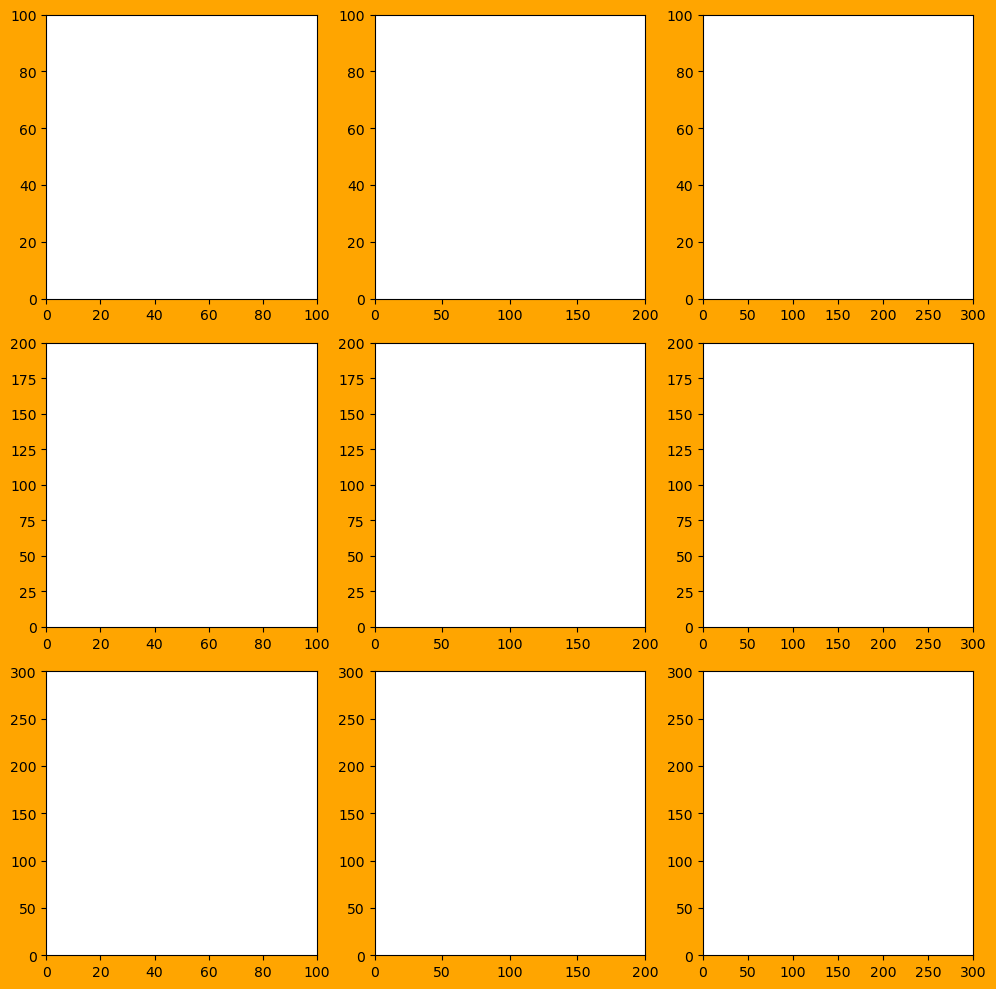

In [9]:
# sharing x_lim
fig = plt.figure(figsize=(10, 10), facecolor='orange')

n_row, n_col = 3, 3
axes = np.empty(shape=(0, 3))

for r_idx in range(n_row):
    axes_row = np.empty(shape=(0, ))
    if r_idx == 0:
        for c_idx in range(n_col):
            if c_idx == 0:
                ax = fig.add_subplot(n_row, n_col, r_idx * n_row + c_idx + 1)
            else:
                ax = fig.add_subplot(n_row, n_col, r_idx * n_row + c_idx + 1, sharey=axes_row[0])
            axes_row = np.append(axes_row, ax)
    else:
        for c_idx in range(n_col):
            if c_idx == 0:
                ax = fig.add_subplot(n_row, n_col, r_idx * n_row + c_idx + 1, sharex=axes[0, c_idx])
            else:
                ax = fig.add_subplot(n_row, n_col, r_idx * n_row + c_idx + 1, sharey=axes_row[0], sharex=axes[0, c_idx])
            axes_row = np.append(axes_row, ax)
    axes = np.vstack([axes, axes_row])

fig.tight_layout()

axes[0, 0].set_ylim([0, 100])
axes[1, 0].set_ylim([0, 200])
axes[2, 0].set_ylim([0, 300])

axes[0, 0].set_xlim([0, 100])
axes[0, 1].set_xlim([0, 200])
axes[0, 2].set_xlim([0, 300])

### 3) subplot2grid

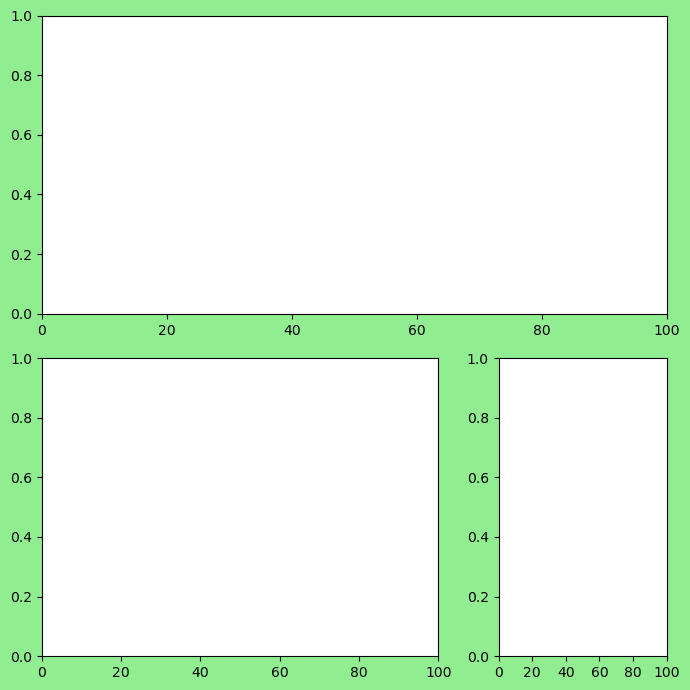

In [10]:
fig = plt.figure(figsize=(7, 7), facecolor='lightgreen')

ax1_1 = plt.subplot2grid((2, 3), (0, 0), colspan=3, fig=fig)
ax2_1 = plt.subplot2grid((2, 3), (1, 0), colspan=2, fig=fig, sharex=ax1_1)
ax2_2 = plt.subplot2grid((2, 3), (1, 2), fig=fig, sharex=ax1_1)

ax1_1.set_xlim([0, 100])
fig.tight_layout()

### 4) add_axes

(0.0, 200.0)

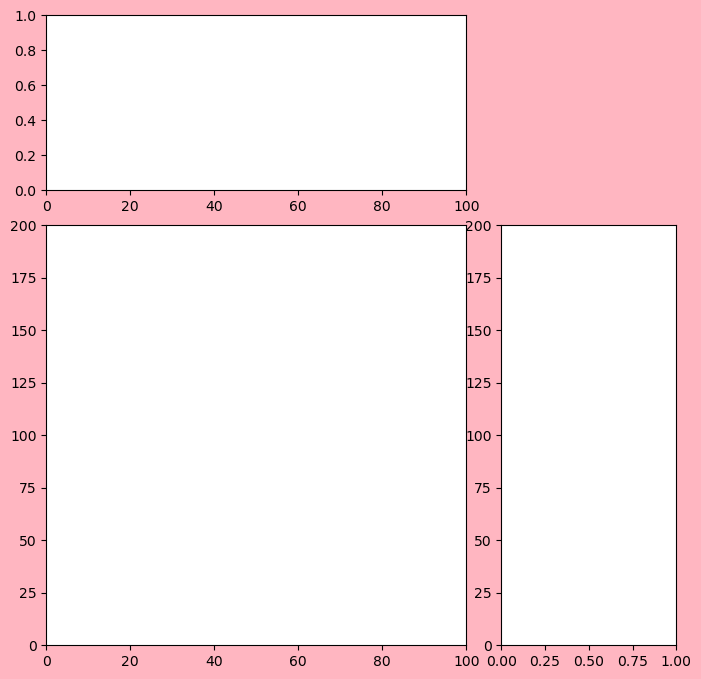

In [12]:
fig = plt.figure(figsize=(7, 7), facecolor='lightpink')

left, bottom = 0.05, 0.05
spacing = 0.05
width1, height1 = 0.6, 0.6
width2 = 1 - (2*left + width1 + spacing)
height2 = 1 - (2*bottom + height1 + spacing)

rect1 = [left, bottom, width1, height1]
rect2 = [left, bottom + height1 + spacing, width1, height2]
rect3 = [left + width1 + spacing, bottom, width2, height1]

ax1 = fig.add_axes(rect1)
ax2 = fig.add_axes(rect2, sharex=ax1)
ax3 = fig.add_axes(rect3, sharey=ax1)

ax1.set_xlim([0, 100])
ax1.set_ylim([0, 200])

### 5) axis sharing 연습문제

In [20]:
# fig = plt.figure(figsize=(20, 10), facecolor='gray')

# n_row, n_col = 3, 4
# axes = np.empty(shape=(0, n_col))
# xlabels = ['Iter 01', 'Iter 11', 'Iter 21', 'Iter 31']
# ylabels = ['Log-Likelihood', 'Negative Grad.', 'Probability']

# for r_idx in range(n_row):
#     axes_row = np.empty(shape=(0, ))
#     for c_idx in range(n_col):
#         ax = fig.add_subplot(n_row, n_col, n_col*r_idx + c_idx + 1)
        
#         ax.plot([], marker='|', color='b', label='regression')
#         ax.plot([], marker='o', color='r', label='cross entropy')
#         ax.plot([], marker='v', color='g', label='target')
#         ax.legend()
        
#         axes_row = np.append(axes_row, ax)
#     axes = np.vstack([axes, axes_row])

# for ax_idx, ax in enumerate(axes.flat):
#     if ax_idx % n_col == 0:
#         ax.set_ylabel(ylabels[ax_idx // n_col], fontsize=20)
#     if ax_idx >= 2*n_col:
#         ax.set_xlabel(xlabels[ax_idx - 2*n_col], fontsize=20)
        
# fig.tight_layout()

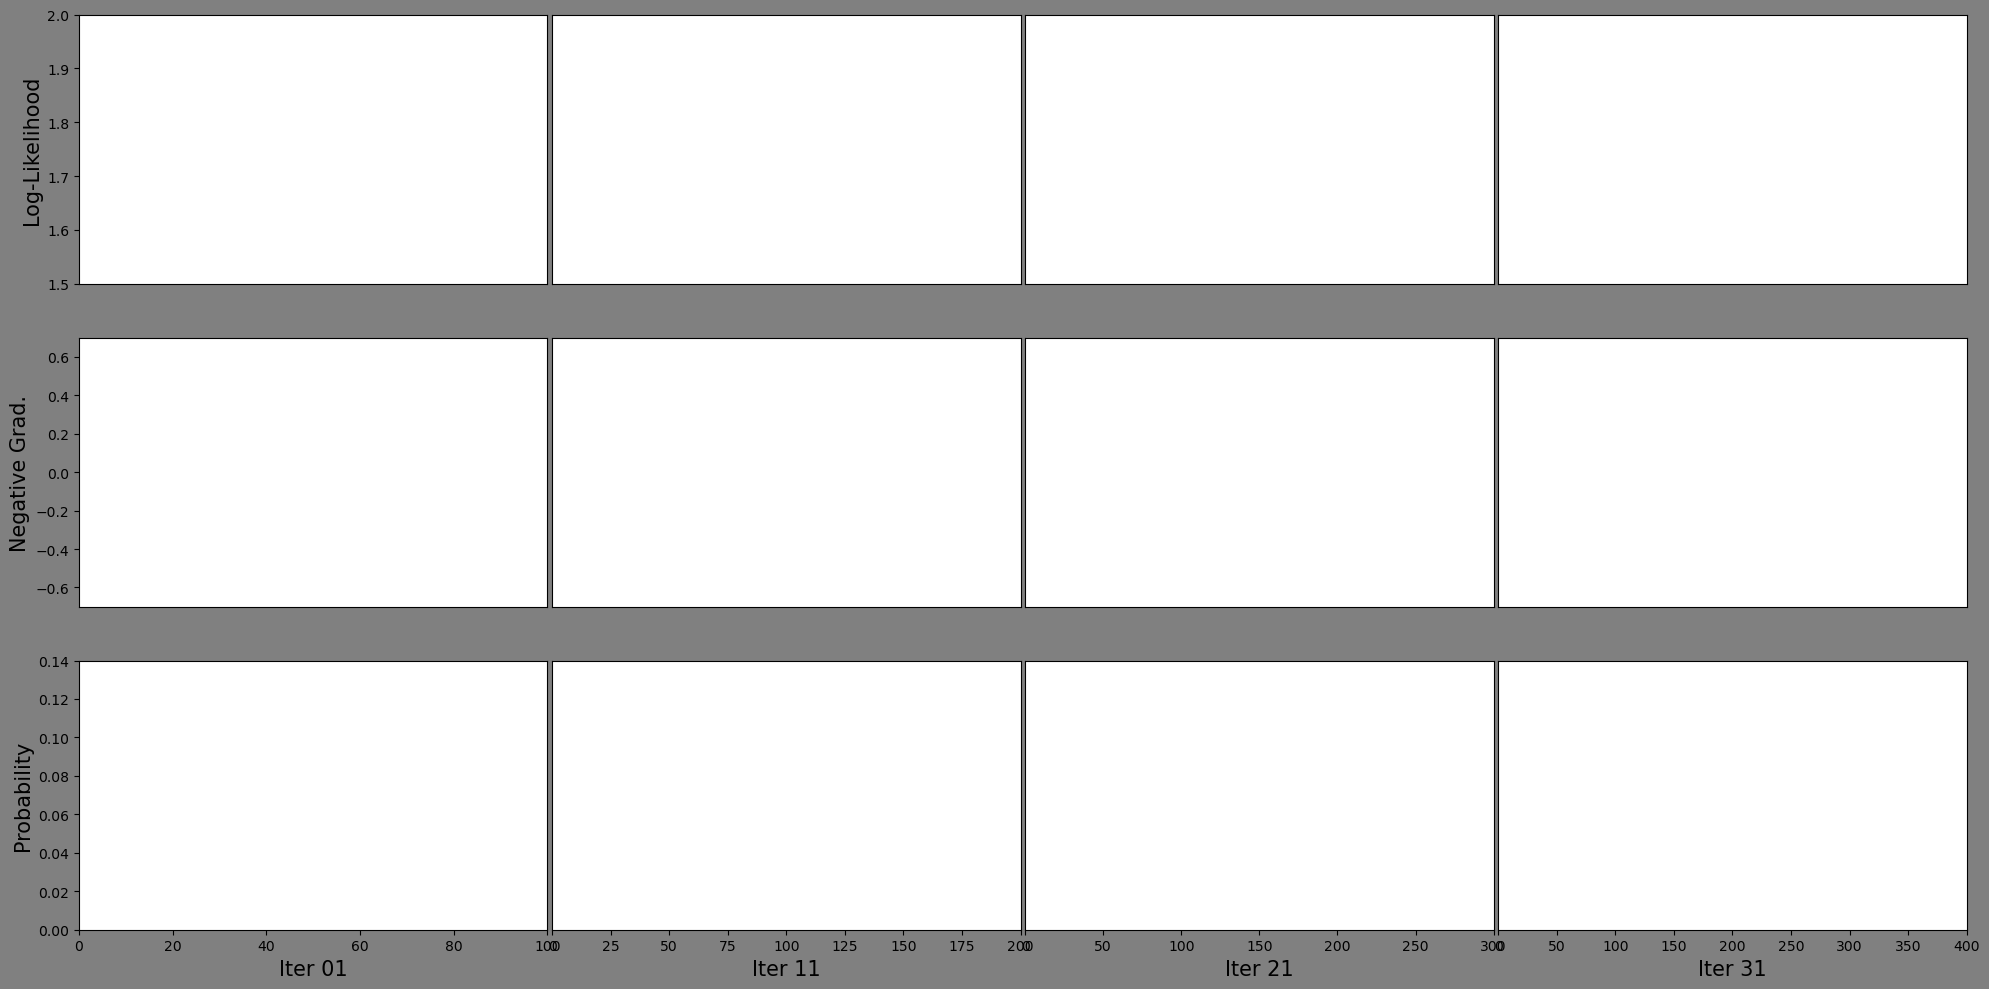

In [35]:
fig = plt.figure(figsize=(20, 10), facecolor='gray')

n_row, n_col = 3, 4
axes = np.empty(shape=(0, n_col))
xlabels = ['Iter 01', 'Iter 11', 'Iter 21', 'Iter 31']
ylabels = ['Log-Likelihood', 'Negative Grad.', 'Probability']

for r_idx in range(n_row):
    axes_row = np.empty(shape=(0, ))
    if r_idx == 0:
        for c_idx in range(n_col):
            if c_idx == 0:
                ax = fig.add_subplot(n_row, n_col, n_col*r_idx + c_idx + 1)
            else:
                ax = fig.add_subplot(n_row, n_col, n_col*r_idx + c_idx + 1, sharey=axes_row[0])
            axes_row = np.append(axes_row, ax)
    else:
        for c_idx in range(n_col):
            if c_idx == 0:
                ax = fig.add_subplot(n_row, n_col, n_col*r_idx + c_idx + 1, sharex=axes[0, c_idx])
            else:
                ax = fig.add_subplot(n_row, n_col, n_col*r_idx + c_idx + 1, sharex=axes[0, c_idx], sharey=axes_row[0])
            axes_row = np.append(axes_row, ax)
    axes = np.vstack([axes, axes_row])
    
axes[0, 0].set_ylim([1.5, 2.0])
axes[1, 0].set_ylim([-0.7, 0.7])
axes[2, 0].set_ylim([0, 0.14])
axes[0, 0].set_xlim([0, 100])
axes[0, 1].set_xlim([0, 200])
axes[0, 2].set_xlim([0, 300])
axes[0, 3].set_xlim([0, 400])

for ax_idx, ax in enumerate(axes.flat):
    if ax_idx % n_col == 0:
        ax.set_ylabel(ylabels[ax_idx // n_col], fontsize=15)
    if ax_idx >= 2*n_col:
        ax.set_xlabel(xlabels[ax_idx - 2*n_col], fontsize=15)
    if ax_idx % n_col != 0:
        ax.get_yaxis().set_visible(False)
    if ax_idx <= n_col*2 - 1:
        ax.get_xaxis().set_visible(False)

fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.01)

## ax.twinx & ax.set_yscale

### 1) ax.twinx
- 왼쪽과 오른쪽 각각에 2개의 서로 다른 축을 선언한다.
- 오른쪽이 새로 생성한 twinx 객체의 축에 해당한다.
- 서로 다른 데이터를 하나의 그래프에 그리고 싶지만 y축의 값이 차이가 많이 나는 경우 사용 가능하다.

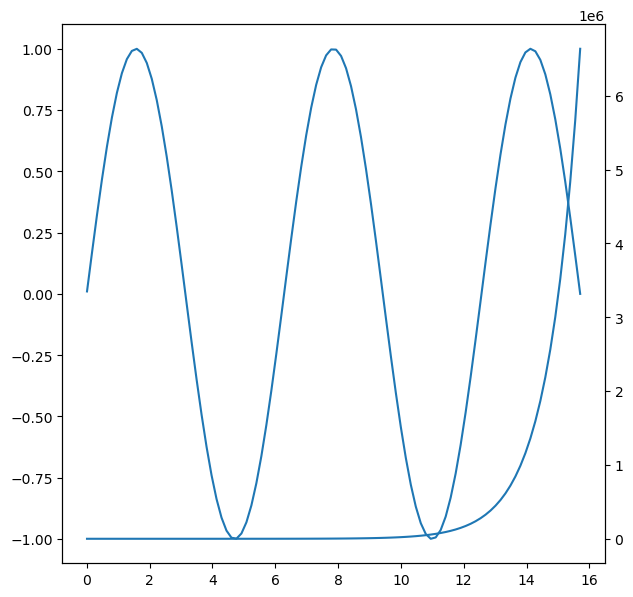

In [38]:
PI = np.pi
t = np.linspace(0.01, 5*PI, 100)
sin = np.sin(t)
exp = np.exp(t)

fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_subplot()
ax1.plot(t, sin)
ax2 = ax1.twinx()
ax2.plot(t, exp)

Text(0, 0.5, 'Data 2')

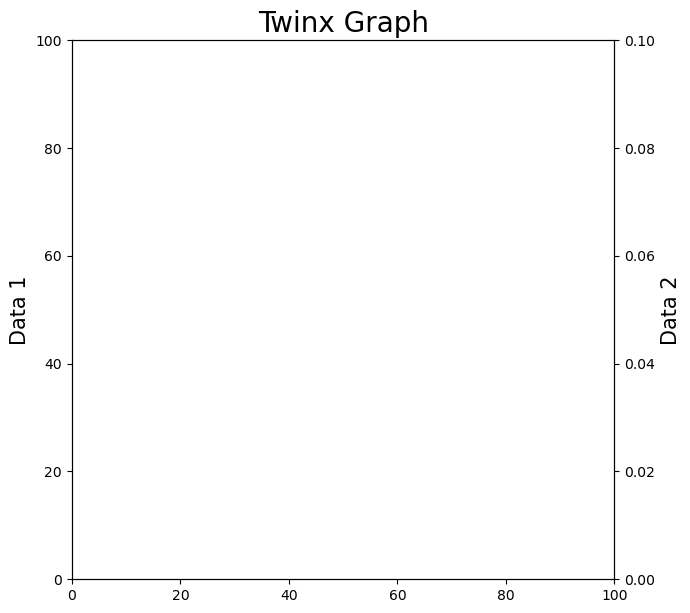

In [43]:
fig = plt.figure(figsize=(7, 7))

ax1 = fig.add_subplot()
ax2 = ax1.twinx()

ax1.set_xlim([0, 100])
ax1.set_ylim([0, 100])
ax2.set_ylim([0, 0.1])

ax1.set_title('Twinx Graph', fontsize=20)
ax1.set_ylabel('Data 1', fontsize=15)
ax2.set_ylabel('Data 2', fontsize=15)

### 2) ax.set_yscale
- ax.set_yscale(value, ...)
    - value: 'linear', 'log', 'logit'

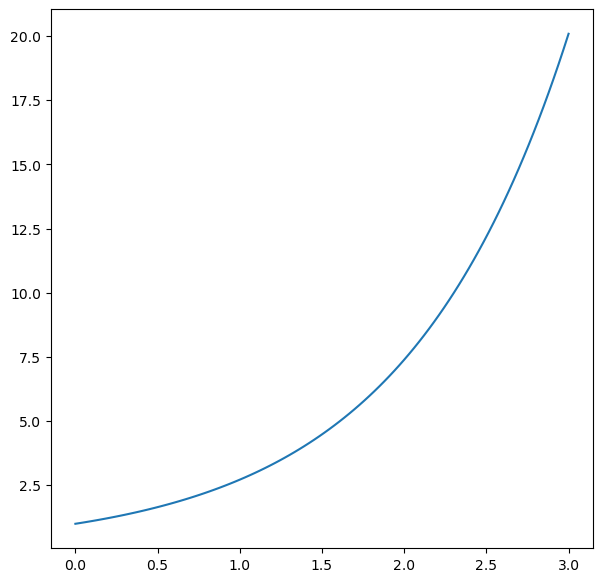

In [46]:
t = np.linspace(0, 3, 100)
exp = np.exp(t)

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(t, exp)

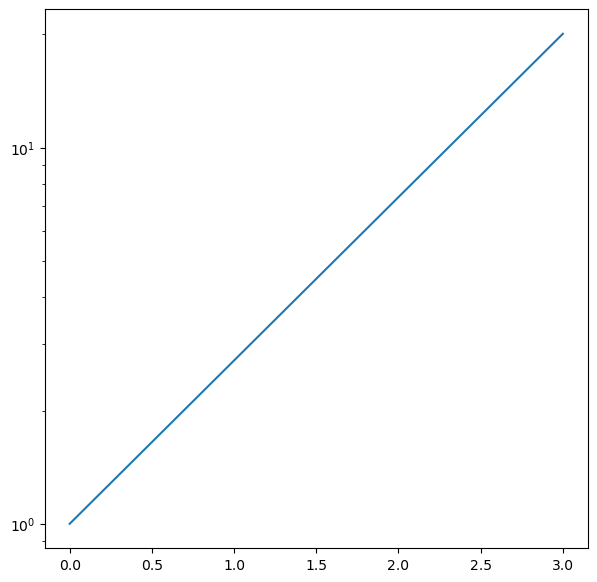

In [47]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_yscale('log')
ax.plot(t, exp)

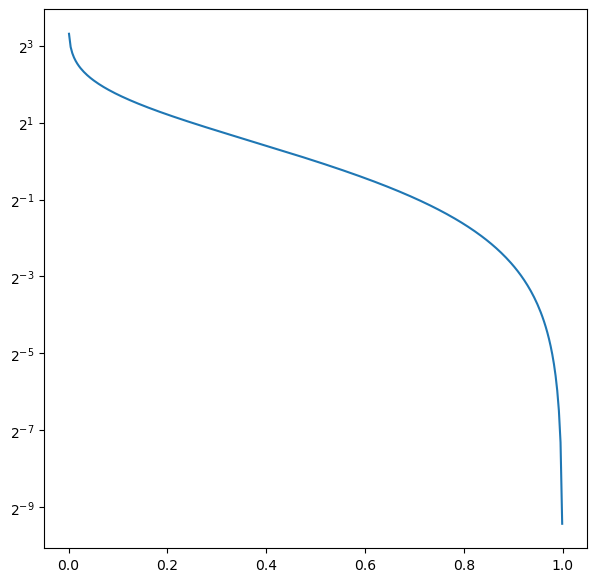

In [49]:
p = np.linspace(0.001, 0.999, 300)
information = -np.log2(p)

fig, ax = plt.subplots(figsize=(7, 7))
ax.set_yscale('log', base=2)
ax.plot(p, information)

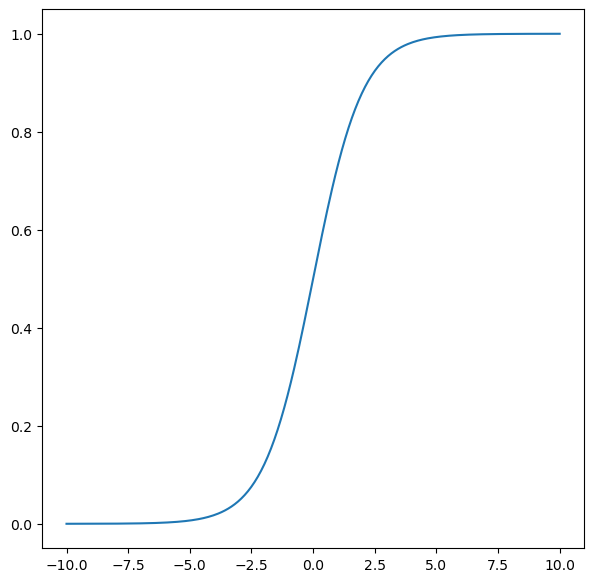

In [50]:
# sigmoid
logit = np.linspace(-10, 10, 300)
sigmoid = 1 / (1 + np.exp(-logit))

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(logit, sigmoid)

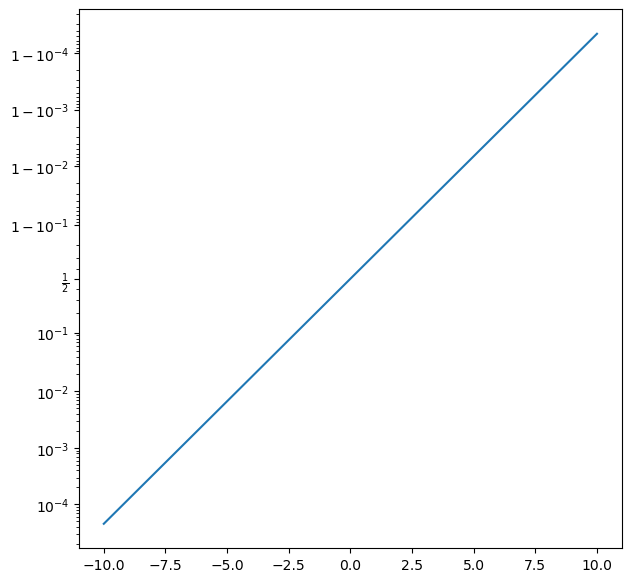

In [53]:
# sigmoid는 logit의 역함수
logit = np.linspace(-10, 10, 300)
sigmoid = 1 / (1 + np.exp(-logit))

fig, ax = plt.subplots(figsize=(7, 7))
ax.set_yscale('logit')
ax.plot(logit, sigmoid)